In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

df = pd.read_csv('Dataset\dataset.csv')

In [3]:
# Extract features (X, Y, Z, Mixed)
features = df[['X', 'Y', 'Z', 'Mixed']]
# Extract target variable (ClassLabel)
labels = df['ClassLabel']



Test size: 0.50, Accuracy: 0.2021
Test size: 0.47, Accuracy: 0.1994
Test size: 0.45, Accuracy: 0.2008
Test size: 0.42, Accuracy: 0.2028
Test size: 0.40, Accuracy: 0.1946
Test size: 0.37, Accuracy: 0.1948
Test size: 0.35, Accuracy: 0.1951
Test size: 0.32, Accuracy: 0.1985
Test size: 0.30, Accuracy: 0.1919
Test size: 0.27, Accuracy: 0.1957
Test size: 0.25, Accuracy: 0.1938
Test size: 0.22, Accuracy: 0.1959
Test size: 0.20, Accuracy: 0.1936
Test size: 0.17, Accuracy: 0.2007
Test size: 0.15, Accuracy: 0.1971
Test size: 0.12, Accuracy: 0.2048
Test size: 0.10, Accuracy: 0.2123
Test size: 0.07, Accuracy: 0.2037
Test size: 0.05, Accuracy: 0.1905
Test size: 0.02, Accuracy: 0.1746


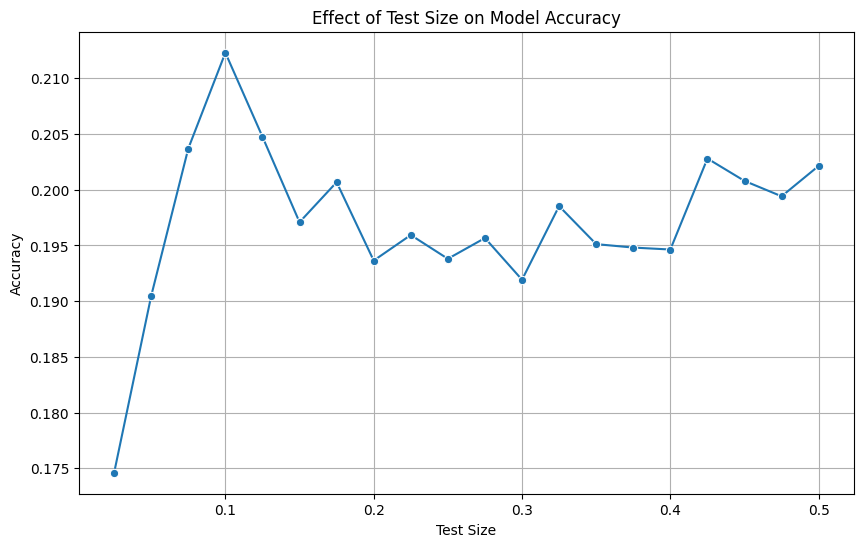

In [14]:
# List to store test sizes and corresponding accuracies
test_sizes = np.arange(0.5, 0.00, -0.025)
accuracies = []

# Loop over different test sizes
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)
    
    # Initialize Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    
    # Train the classifier on the training data
    gnb.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = gnb.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Test size: {test_size:.2f}, Accuracy: {accuracy:.4f}")

# Plot test sizes against accuracies
plt.figure(figsize=(10, 6))
sns.lineplot(x=test_sizes, y=accuracies, marker='o')
plt.title('Effect of Test Size on Model Accuracy')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Test size: 0.50, Mean Accuracy: 0.2032
Test size: 0.47, Mean Accuracy: 0.2032
Test size: 0.45, Mean Accuracy: 0.2032
Test size: 0.42, Mean Accuracy: 0.2032
Test size: 0.40, Mean Accuracy: 0.2032
Test size: 0.37, Mean Accuracy: 0.2032
Test size: 0.35, Mean Accuracy: 0.2032
Test size: 0.32, Mean Accuracy: 0.2046
Test size: 0.30, Mean Accuracy: 0.2046
Test size: 0.27, Mean Accuracy: 0.2046
Test size: 0.25, Mean Accuracy: 0.2048
Test size: 0.22, Mean Accuracy: 0.2048
Test size: 0.20, Mean Accuracy: 0.2042
Test size: 0.17, Mean Accuracy: 0.2042
Test size: 0.15, Mean Accuracy: 0.2032
Test size: 0.12, Mean Accuracy: 0.2030
Test size: 0.10, Mean Accuracy: 0.2038
Test size: 0.07, Mean Accuracy: 0.2034
Test size: 0.05, Mean Accuracy: 0.2034
Test size: 0.02, Mean Accuracy: 0.2036


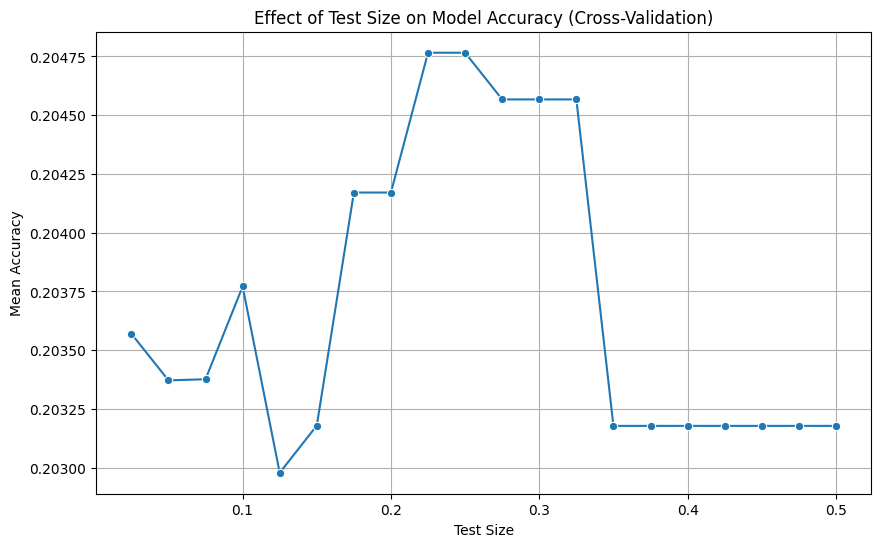

In [15]:
# List to store test sizes and corresponding accuracies
test_sizes = np.arange(0.5, 0, -0.025)
accuracies = []

# Loop over different test sizes
for test_size in test_sizes:
    # Calculate the number of splits for the given test size
    n_splits = int(1 / test_size)
    
    # Initialize Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    
    # Perform cross-validation
    scores = cross_val_score(gnb, features, labels, cv=n_splits)
    
    # Calculate the mean accuracy across all folds
    mean_accuracy = scores.mean()
    accuracies.append(mean_accuracy)
    
    print(f"Test size: {test_size:.2f}, Mean Accuracy: {mean_accuracy:.4f}")

# Plot test sizes against accuracies
plt.figure(figsize=(10, 6))
sns.lineplot(x=test_sizes, y=accuracies, marker='o')
plt.title('Effect of Test Size on Model Accuracy (Cross-Validation)')
plt.xlabel('Test Size')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

In [19]:
# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Test size: 0.50, Mean Accuracy: 0.2306
Test size: 0.45, Mean Accuracy: 0.2306
Test size: 0.40, Mean Accuracy: 0.2306
Test size: 0.35, Mean Accuracy: 0.2306
Test size: 0.30, Mean Accuracy: 0.2085
Test size: 0.25, Mean Accuracy: 0.2085
Test size: 0.20, Mean Accuracy: 0.2097
Test size: 0.15, Mean Accuracy: 0.2091


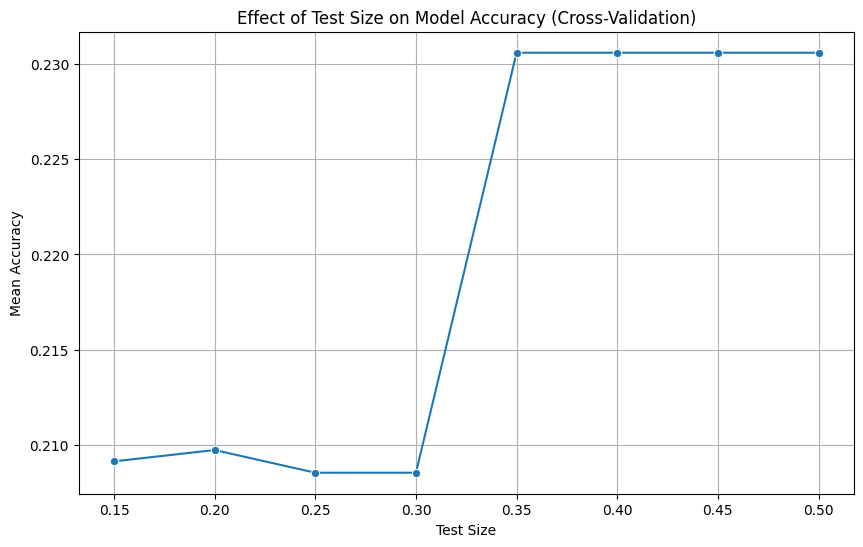

In [21]:
# List to store test sizes and corresponding accuracies
test_sizes = np.arange(0.5, 0.1, -0.05)
accuracies = []

# Loop over different test sizes
for test_size in test_sizes:
    # Calculate the number of splits for the given test size
    n_splits = int(1 / test_size)
    
    # Initialize Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    
    # Perform cross-validation
    scores = cross_val_score(gnb, features_scaled, labels, cv=n_splits)
    
    # Calculate the mean accuracy across all folds
    mean_accuracy = scores.mean()
    accuracies.append(mean_accuracy)
    
    print(f"Test size: {test_size:.2f}, Mean Accuracy: {mean_accuracy:.4f}")

# Plot test sizes against accuracies
plt.figure(figsize=(10, 6))
sns.lineplot(x=test_sizes, y=accuracies, marker='o')
plt.title('Effect of Test Size on Model Accuracy (Cross-Validation)')
plt.xlabel('Test Size')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

Test size: 0.50, Mean Accuracy: 0.2369
Test size: 0.45, Mean Accuracy: 0.2369
Test size: 0.40, Mean Accuracy: 0.2369
Test size: 0.35, Mean Accuracy: 0.2369
Test size: 0.30, Mean Accuracy: 0.2111
Test size: 0.25, Mean Accuracy: 0.2111
Test size: 0.20, Mean Accuracy: 0.2186
Test size: 0.15, Mean Accuracy: 0.2205


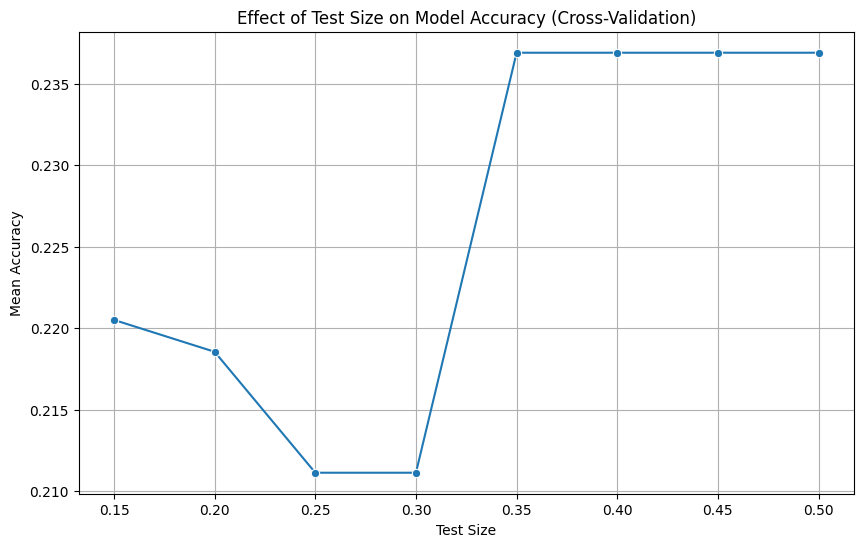

In [23]:
# Handling imbalanced data using SMOTE
smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features_scaled, labels)

# List to store test sizes and corresponding accuracies
test_sizes = np.arange(0.5, 0.1, -0.05)
accuracies = []

# Loop over different test sizes
for test_size in test_sizes:
    # Calculate the number of splits for the given test size
    n_splits = int(1 / test_size)
    
    # Initialize Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    
    # Perform cross-validation
    scores = cross_val_score(gnb, features_resampled, labels_resampled, cv=n_splits)
    
    # Calculate the mean accuracy across all folds
    mean_accuracy = scores.mean()
    accuracies.append(mean_accuracy)
    
    print(f"Test size: {test_size:.2f}, Mean Accuracy: {mean_accuracy:.4f}")

# Plot test sizes against accuracies
plt.figure(figsize=(10, 6))
sns.lineplot(x=test_sizes, y=accuracies, marker='o')
plt.title('Effect of Test Size on Model Accuracy (Cross-Validation)')
plt.xlabel('Test Size')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()